In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
#preprocessing

In [2]:
air_quality_df = pd.read_csv('../OmdenaAirQualityPredictionProject/merged-df.csv',index_col=0)

In [3]:
air_quality_df = air_quality_df.drop_duplicates()

In [4]:
air_quality_df.dtypes

timestamp                           object
temperature_2m_(°C)                float64
relative_humidity_2m_(%)             int64
dew_point_2m_(°C)                  float64
apparent_temperature_(°C)          float64
precipitation_(mm)                 float64
pressure_msl_(hPa)                 float64
surface_pressure_(hPa)             float64
cloud_cover_(%)                      int64
cloud_cover_low_(%)                  int64
cloud_cover_mid_(%)                  int64
cloud_cover_high_(%)                 int64
wind_speed_10m_(km/h)              float64
wind_speed_100m_(km/h)             float64
wind_direction_10m(°)                int64
wind_direction_100m_(°)              int64
temperature_2m_max_(°C)            float64
temperature_2m_min_(°C)            float64
temperature_2m_mean_(°C)           float64
daylight_duration_(s)              float64
sunshine_duration_(s)              float64
precipitation_hours_(h)              int64
shortwave_radiation_sum_(MJ/m²)    float64
CO_(μg/m³) 

In [4]:
air_quality_df.isnull().sum()

timestamp                          0
temperature_2m_(°C)                0
relative_humidity_2m_(%)           0
dew_point_2m_(°C)                  0
apparent_temperature_(°C)          0
precipitation_(mm)                 0
pressure_msl_(hPa)                 0
surface_pressure_(hPa)             0
cloud_cover_(%)                    0
cloud_cover_low_(%)                0
cloud_cover_mid_(%)                0
cloud_cover_high_(%)               0
wind_speed_10m_(km/h)              0
wind_speed_100m_(km/h)             0
wind_direction_10m(°)              0
wind_direction_100m_(°)            0
temperature_2m_max_(°C)            0
temperature_2m_min_(°C)            0
temperature_2m_mean_(°C)           0
daylight_duration_(s)              0
sunshine_duration_(s)              0
precipitation_hours_(h)            0
shortwave_radiation_sum_(MJ/m²)    0
CO_(μg/m³)                         0
NO_(μg/m³)                         0
NO2_(μg/m³)                        0
O3_(μg/m³)                         0
S

In [4]:
new_df = air_quality_df.copy()

In [5]:
new_df['date'] = pd.to_datetime(new_df['timestamp'])

In [6]:
new_df.insert(0, 'date', new_df.pop('date'))

In [7]:
new_df.set_index('date',inplace=True)

In [8]:
new_df =new_df.drop(columns=["timestamp","AirQualityIndex"], axis=1)

In [9]:
new_df.head()

,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),cloud_cover_mid_(%),...,precipitation_hours_(h),shortwave_radiation_sum_(MJ/m²),CO_(μg/m³),NO_(μg/m³),NO2_(μg/m³),O3_(μg/m³),SO2_(μg/m³),PM2_5_(μg/m³),PM10_(μg/m³),NH3_(μg/m³)
date,,,,,,,,,,,,,,,,,,,,,
2020-11-27 17:00:00+00:00,21.5,28,2.3,20.3,0.0,1017.8,790.8,0,0,0,...,0,20.72,834.47,4.08,23.65,150,44.82,37.87,42.38,0.82
2020-11-27 18:00:00+00:00,23.6,22,0.4,22.6,0.0,1015.8,790.6,0,0,0,...,0,20.72,754.36,2.04,15.08,192,41.49,38.62,42.09,0.48
2020-11-27 19:00:00+00:00,24.9,18,-1.1,23.8,0.0,1013.6,789.7,48,0,0,...,0,20.72,460.63,1.03,6.34,147,22.17,20.17,21.85,0.29
2020-11-27 20:00:00+00:00,25.7,15,-2.8,24.0,0.0,1011.9,788.9,54,0,0,...,0,20.72,393.87,0.89,5.36,139,18.60,15.48,16.76,0.34
2020-11-27 21:00:00+00:00,25.9,13,-4.3,23.2,0.0,1010.8,788.2,28,0,0,...,0,20.72,410.56,0.85,6.00,149,20.27,16.12,17.38,0.40


In [10]:
new_df.describe()

,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),cloud_cover_mid_(%),...,precipitation_hours_(h),shortwave_radiation_sum_(MJ/m²),CO_(μg/m³),NO_(μg/m³),NO2_(μg/m³),O3_(μg/m³),SO2_(μg/m³),PM2_5_(μg/m³),PM10_(μg/m³),NH3_(μg/m³)
count,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,...,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000
mean,17.144152,59.209168,7.152659,15.874292,0.128737,1016.664995,786.901953,53.031105,14.192212,20.989564,...,3.950536,22.343551,1076.367190,15.552382,35.951425,62.335750,39.975354,34.049941,43.822510,3.656965
std,5.412888,25.441183,5.551853,5.570121,0.618486,4.173123,2.414803,40.489202,27.316756,29.374536,...,5.291133,4.057998,868.662959,37.390540,81.999676,90.181554,26.912680,31.144893,67.737227,4.784984
min,1.100000,2.000000,-23.400000,-4.000000,0.000000,1000.900000,774.900000,0.000000,0.000000,0.000000,...,0.000000,6.260000,198.600000,0.000000,-9999.000000,-9999.000000,2.500000,0.500000,-9999.000000,0.000000
25%,13.400000,39.000000,3.800000,12.200000,0.000000,1014.000000,785.500000,8.000000,0.000000,0.000000,...,0.000000,19.820000,480.650000,0.190000,14.740000,4.000000,21.460000,12.015000,15.280000,0.780000
50%,16.400000,62.000000,8.200000,15.500000,0.000000,1017.000000,787.100000,55.000000,0.000000,6.000000,...,1.000000,22.750000,794.410000,1.090000,30.160000,36.000000,33.850000,25.290000,31.790000,1.570000
75%,21.000000,82.000000,11.800000,19.700000,0.000000,1019.600000,788.500000,98.000000,14.000000,31.000000,...,7.000000,25.510000,1348.500000,10.620000,50.040000,99.000000,51.020000,46.120000,59.810000,4.620000
max,34.100000,100.000000,16.400000,33.000000,12.600000,1030.400000,794.800000,100.000000,100.000000,100.000000,...,24.000000,31.150000,8224.490000,450.610000,318.050000,607.000000,370.030000,386.920000,421.100000,36.480000


In [9]:
new_df = new_df.astype("float64")
new_df["precipitation_hours_(h)"] = new_df["precipitation_hours_(h)"].astype("int64")

# Check the data type
print(new_df.dtypes)

temperature_2m_(°C)                float64
relative_humidity_2m_(%)           float64
dew_point_2m_(°C)                  float64
apparent_temperature_(°C)          float64
precipitation_(mm)                 float64
pressure_msl_(hPa)                 float64
surface_pressure_(hPa)             float64
cloud_cover_(%)                    float64
cloud_cover_low_(%)                float64
cloud_cover_mid_(%)                float64
cloud_cover_high_(%)               float64
wind_speed_10m_(km/h)              float64
wind_speed_100m_(km/h)             float64
wind_direction_10m(°)              float64
wind_direction_100m_(°)            float64
temperature_2m_max_(°C)            float64
temperature_2m_min_(°C)            float64
temperature_2m_mean_(°C)           float64
daylight_duration_(s)              float64
sunshine_duration_(s)              float64
precipitation_hours_(h)              int64
shortwave_radiation_sum_(MJ/m²)    float64
CO_(μg/m³)                         float64
NO_(μg/m³) 

In [18]:
# Insight from table

Few large negative numbers are found in pollutants like O3 , NO2 and PM10, which is assumed to be anormalies.

In [10]:
anormaly_col = ['O3_(μg/m³)','NO2_(μg/m³)','PM10_(μg/m³)']

for col in anormaly_col:
    mean = new_df[col].mean()
    new_df[col] = new_df[col].apply(lambda x: mean if x<=-9999 else x)

In [16]:
new_df.describe()

,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),cloud_cover_mid_(%),...,precipitation_hours_(h),shortwave_radiation_sum_(MJ/m²),CO_(μg/m³),NO_(μg/m³),NO2_(μg/m³),O3_(μg/m³),SO2_(μg/m³),PM2_5_(μg/m³),PM10_(μg/m³),NH3_(μg/m³)
count,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,...,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000,34207.000000
mean,17.144152,59.209168,7.152659,15.874292,0.128737,1016.664995,786.901953,53.031105,14.192212,20.989564,...,3.950536,22.343551,1076.367190,15.552382,36.538144,62.629881,39.975354,34.049941,44.116100,3.656965
std,5.412888,25.441183,5.551853,5.570121,0.618486,4.173123,2.414803,40.489202,27.316756,29.374536,...,5.291133,4.057998,868.662959,37.390540,28.909029,71.924890,26.912680,31.144893,40.493091,4.784984
min,1.100000,2.000000,-23.400000,-4.000000,0.000000,1000.900000,774.900000,0.000000,0.000000,0.000000,...,0.000000,6.260000,198.600000,0.000000,1.630000,0.000000,2.500000,0.500000,1.320000,0.000000
25%,13.400000,39.000000,3.800000,12.200000,0.000000,1014.000000,785.500000,8.000000,0.000000,0.000000,...,0.000000,19.820000,480.650000,0.190000,14.740000,4.000000,21.460000,12.015000,15.280000,0.780000
50%,16.400000,62.000000,8.200000,15.500000,0.000000,1017.000000,787.100000,55.000000,0.000000,6.000000,...,1.000000,22.750000,794.410000,1.090000,30.160000,36.000000,33.850000,25.290000,31.790000,1.570000
75%,21.000000,82.000000,11.800000,19.700000,0.000000,1019.600000,788.500000,98.000000,14.000000,31.000000,...,7.000000,25.510000,1348.500000,10.620000,50.040000,99.000000,51.020000,46.120000,59.810000,4.620000
max,34.100000,100.000000,16.400000,33.000000,12.600000,1030.400000,794.800000,100.000000,100.000000,100.000000,...,24.000000,31.150000,8224.490000,450.610000,318.050000,607.000000,370.030000,386.920000,421.100000,36.480000


In [ ]:
# Finding outliers from different columns

In [11]:
# Using IQR method
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1
outliers = (new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR))
print(outliers.sum()) # Number of outliers per column

temperature_2m_(°C)                  58
relative_humidity_2m_(%)              0
dew_point_2m_(°C)                   559
apparent_temperature_(°C)           112
precipitation_(mm)                 5629
pressure_msl_(hPa)                  205
surface_pressure_(hPa)              626
cloud_cover_(%)                       0
cloud_cover_low_(%)                4679
cloud_cover_mid_(%)                3124
cloud_cover_high_(%)                  0
wind_speed_10m_(km/h)              1385
wind_speed_100m_(km/h)              791
wind_direction_10m(°)                 0
wind_direction_100m_(°)               0
temperature_2m_max_(°C)              48
temperature_2m_min_(°C)              96
temperature_2m_mean_(°C)           1247
daylight_duration_(s)                 0
sunshine_duration_(s)              2184
precipitation_hours_(h)             960
shortwave_radiation_sum_(MJ/m²)     408
CO_(μg/m³)                         2081
NO_(μg/m³)                         5225
NO2_(μg/m³)                        1008


## The approach is that the most influential features will be selected and presented. The outliers will be removed and replaced with median values to ensure that there is no hinderence in analyzing and model predication.

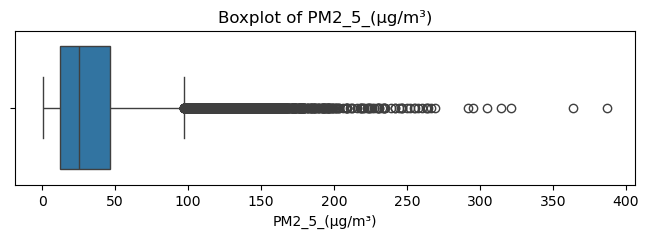

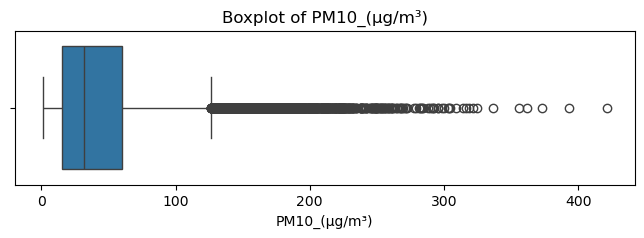

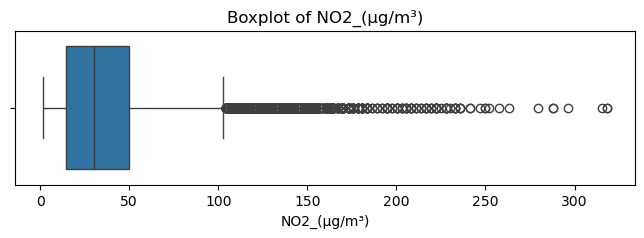

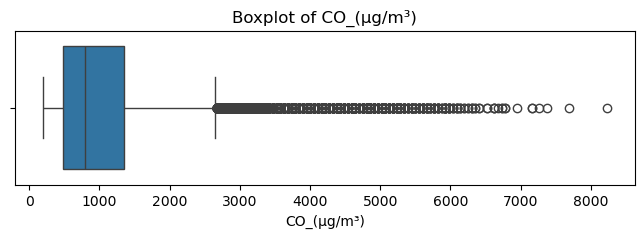

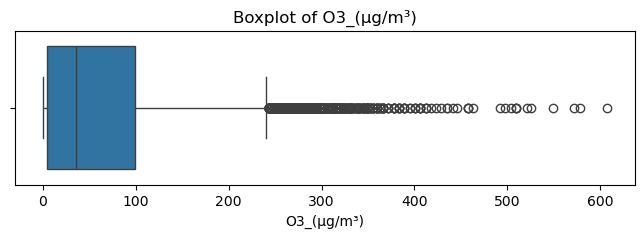

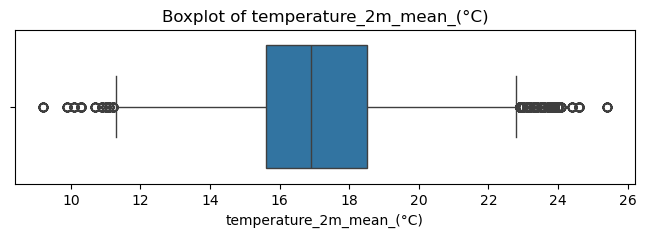

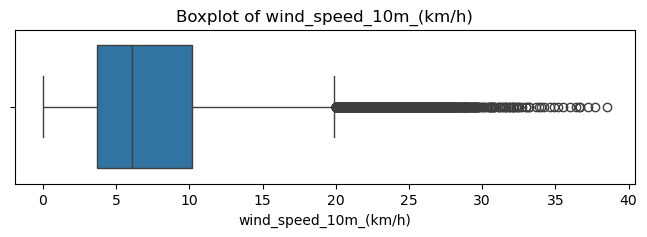

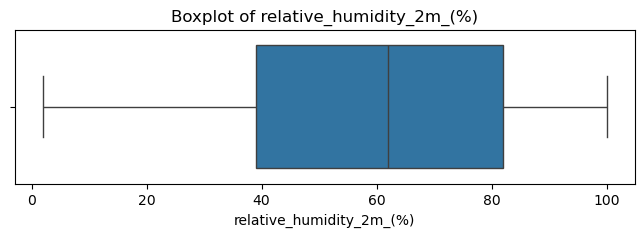

In [12]:
columns = ["PM2_5_(μg/m³)","PM10_(μg/m³)","NO2_(μg/m³)","CO_(μg/m³)","O3_(μg/m³)","temperature_2m_mean_(°C)","wind_speed_10m_(km/h)","relative_humidity_2m_(%)"]

for col in new_df[columns]:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=new_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## To have a better insight, box plot is the most appropriate to visualize. Even from box plots , we can learn that relaive humnidity shows no extreme outliers while others do.

## Calculating accuracy with outliers

In [13]:
new_df["AirQualityIndex"] = air_quality_df["AirQualityIndex"].values

In [14]:
X = new_df[columns].select_dtypes(include=['float64', 'int64']).drop('AirQualityIndex', axis=1,errors="ignore")
y = new_df['AirQualityIndex'] 
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model 
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model on the training data
rf_clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           1       0.86      0.91      0.89       918
           2       0.89      0.84      0.87      1660
           3       0.75      0.76      0.76      1466
           4       0.72      0.74      0.73      1483
           5       0.88      0.87      0.88      1315

    accuracy                           0.82      6842
   macro avg       0.82      0.82      0.82      6842
weighted avg       0.82      0.82      0.82      6842

[[ 839   79    0    0    0]
 [ 137 1399  124    0    0]
 [   0   96 1112  258    0]
 [   0    0  237 1093  153]
 [   0    0    0  173 1142]]


In [15]:
columns = ["PM2_5_(μg/m³)","PM10_(μg/m³)","NO2_(μg/m³)","CO_(μg/m³)","O3_(μg/m³)","temperature_2m_mean_(°C)","wind_speed_10m_(km/h)","relative_humidity_2m_(%)"]

for cols in columns:
    Q1 = new_df[cols].quantile(0.25)
    Q3 = new_df[cols].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = new_df[cols].median()
    new_df[cols] = new_df[cols].apply(lambda x : median if x < lower or x > upper else x)

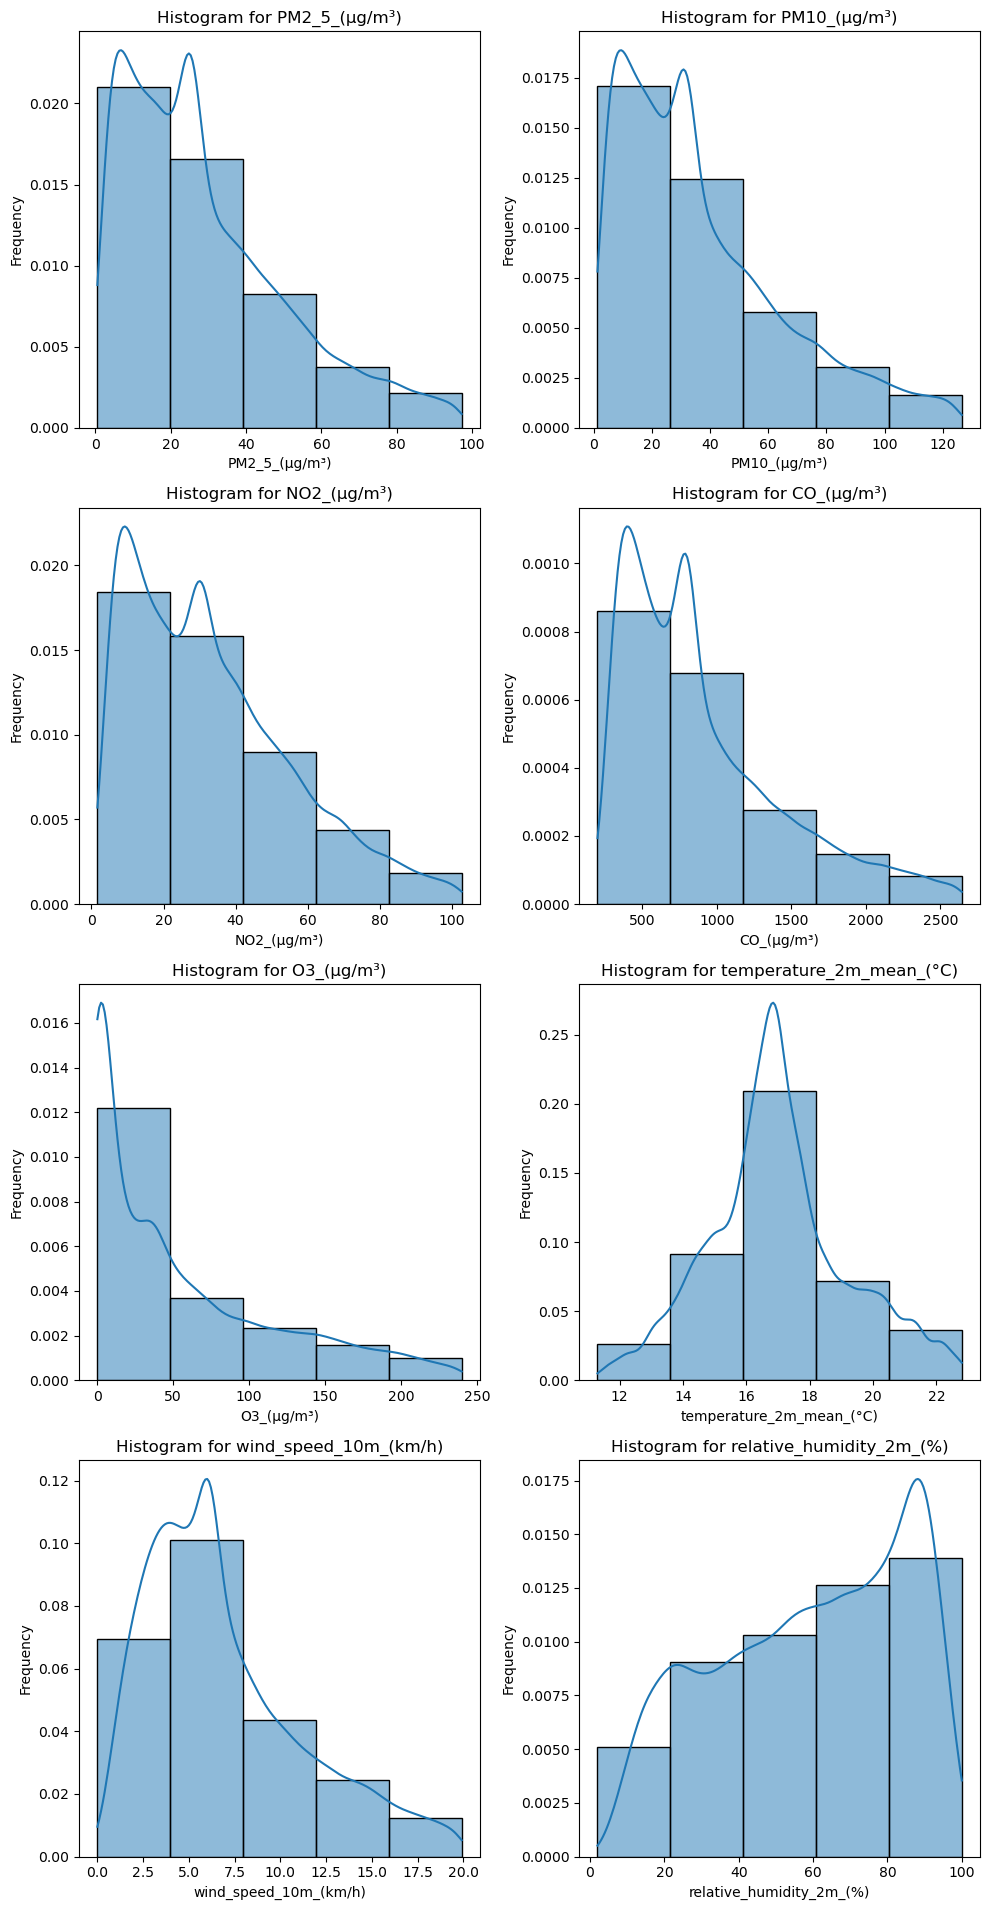

In [16]:
def get_df(df):
    num_columns = len(df.columns)
    num_rows = math.ceil(num_columns / 2)
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 5))
    axes = axes.flatten()
    
    for i, column in enumerate(df.columns):
        sns.histplot(df[column], bins=5, stat="density" ,  kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram for {column}')
        axes[i].set_xlabel(f'{column}')
        axes[i].set_ylabel('Frequency')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot histograms for the specified columns in skewness_df
get_df(new_df[columns])

# In my opinion , excluding the outliers and replacing with sutiable values can be a effective approach to develop a preditable model.In general , most plots are showcasing a constant decreasing in the number of pollutants. On the other hands, mean of temperature has a pattern of normal distribution but not in a perfect way ,and relative humidity with no outliers gives the gradaul upward trend.

In [17]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

vif_df = calculate_vif(new_df[columns])
print(vif_df.sort_values(by='VIF'))

                    feature        VIF
4                O3_(μg/m³)   3.228122
6     wind_speed_10m_(km/h)   3.931262
7  relative_humidity_2m_(%)   7.759677
2               NO2_(μg/m³)   8.208375
3                CO_(μg/m³)  13.234266
5  temperature_2m_mean_(°C)  16.198115
0             PM2_5_(μg/m³)  17.260262
1              PM10_(μg/m³)  18.856302


## I think that ensuring whether two or more independented variables are higly corrected or not is an appropriate view.From the statistic table , each variable has moderate correction but in my opinoin , it is determined not to do further observation.

# Without Outliers

In [20]:
aqi_df = new_df[columns].copy()
aqi_df["AirQualityIndex"] = air_quality_df["AirQualityIndex"].values

In [21]:
X = aqi_df[columns].select_dtypes(include=['float64', 'int64']).drop('AirQualityIndex', axis=1,errors="ignore")
y = aqi_df['AirQualityIndex'] 
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model 
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model on the training data
rf_clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.81
              precision    recall  f1-score   support

           1       0.85      0.91      0.88       918
           2       0.88      0.84      0.86      1660
           3       0.75      0.75      0.75      1466
           4       0.71      0.72      0.72      1483
           5       0.88      0.86      0.87      1315

    accuracy                           0.81      6842
   macro avg       0.81      0.82      0.82      6842
weighted avg       0.81      0.81      0.81      6842

[[ 836   82    0    0    0]
 [ 148 1397  115    0    0]
 [   0  104 1103  259    0]
 [   0    0  258 1071  154]
 [   0    0    0  180 1135]]


## Comparing With outliers Vs Without outliers

Both models with or without outliers performs well at around 80% although some improvements are required to push accuracy higher.

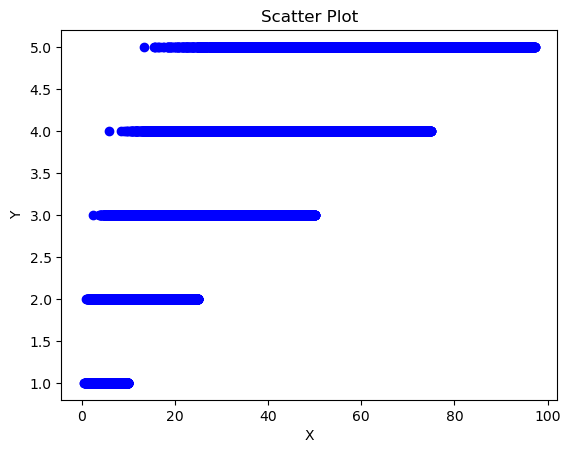

In [23]:
plt.scatter(X.iloc[:, 0], y, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()

In [29]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

r2_linear = r2_score(y, y_pred_linear)
print(f"R² Score (Linear Regression): {r2_linear:.4f}")
print("Intercept:", linear_model.intercept_)
print("Coefficients:", linear_model.coef_)
print("Feature Names:", X.columns.tolist())
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

R² Score (Linear Regression): 0.7045
Intercept: 1.7024270434367392
Coefficients: [ 0.03066082  0.00846755  0.00775126  0.00011754  0.0059572   0.00162881
 -0.03415009 -0.00489651]
Feature Names: ['PM2_5_(μg/m³)', 'PM10_(μg/m³)', 'NO2_(μg/m³)', 'CO_(μg/m³)', 'O3_(μg/m³)', 'temperature_2m_mean_(°C)', 'wind_speed_10m_(km/h)', 'relative_humidity_2m_(%)']
Mean Squared Error (MSE): 0.19000292312189418


## Linear Regression Model Performance
This is a farily good predictable model ,which explains about 70.45% of variance in the target value and a lower MSE indicate moderate predication error , meaning perform well
From cofficients , the most influential polluant is PM2_5 -as this inceases, the predicated value increases significantly while others have smaller effects.On the other hand , wind speed has the most negative impact,which associate with lower predications.

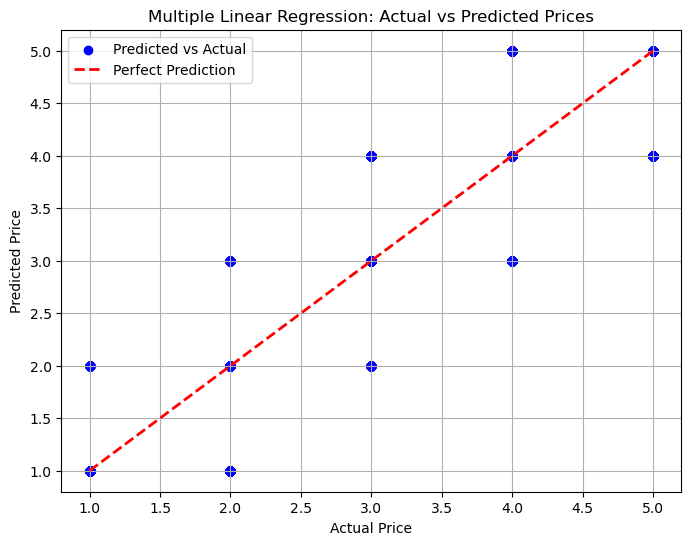

In [30]:
## Plot 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Residuals - Linear Regression')

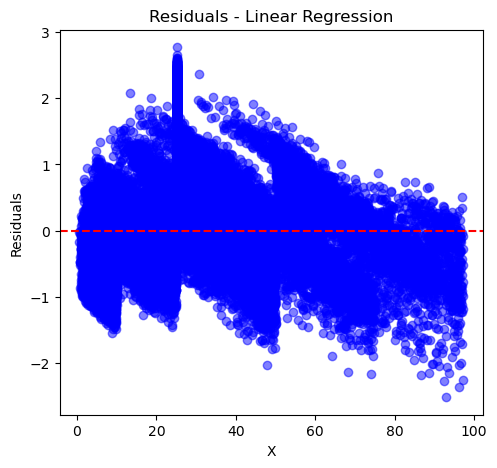

In [32]:
# Residual Analysis
residuals_linear = y - y_pred_linear

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], residuals_linear, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals - Linear Regression')

## Plot insight
The residuals show no non-random pattern and there is a clear pattern , indicating non-linearity in the data.Therefore,this can be concluded that this doesn't capture all the data points and considered misfit.The alternatives models are preferable.


## Saving model file and testing with new data

In [43]:
import joblib

# Save
joblib.dump(linear_model, 'mexico_aiq_model.pkl')

# Load
loaded_model = joblib.load('mexico_aiq_model.pkl')

# Set number of samples
n_samples = 100

# Generate random data within realistic ranges
data = {
    "PM2_5_(μg/m³)": np.random.uniform(5, 150, n_samples),
    "PM10_(μg/m³)": np.random.uniform(10, 200, n_samples),
    "NO2_(μg/m³)": np.random.uniform(5, 100, n_samples),
    "CO_(μg/m³)": np.random.uniform(0.1, 10, n_samples),
    "O3_(μg/m³)": np.random.uniform(10, 120, n_samples),
    "temperature_2m_mean_(°C)": np.random.uniform(-10, 40, n_samples),
    "wind_speed_10m_(km/h)": np.random.uniform(0, 50, n_samples),
    "relative_humidity_2m_(%)": np.random.uniform(20, 100, n_samples)
}

# Create DataFrame
df = pd.DataFrame(data)

# Show a few rows
print(df.head())


# Example: Use the DataFrame created earlier (df)
# Select the first row as input for prediction
example_input = df.iloc[0:1]

# Predict with the loaded model
prediction = loaded_model.predict(example_input)  # This should work now

# Print the prediction
print("Prediction:", prediction)
print(f"Predicted aqi for air new quality index: {prediction[0]:,.2f}")

   PM2_5_(μg/m³)  PM10_(μg/m³)  NO2_(μg/m³)  CO_(μg/m³)  O3_(μg/m³)  \
0      83.132531    141.807158    17.867349    7.299432   86.543458   
1       5.634022    170.299881    81.322597    5.025932   45.214651   
2      22.073546     28.417037    98.171119    4.823069   54.774790   
3      18.192177     59.159588    71.146937    9.897901  102.820246   
4      17.001930    198.447053    79.189491    9.807032   38.759453   

   temperature_2m_mean_(°C)  wind_speed_10m_(km/h)  relative_humidity_2m_(%)  
0                  7.253015              49.847634                 25.333222  
1                  2.189316              27.418605                 82.838089  
2                  6.416519               1.376876                 38.904373  
3                  5.439595              42.522910                 80.191236  
4                 19.659492              13.445192                 56.518131  
Prediction: [4.29247538]
Predicted aqi for air new quality index: 4.29
